# Exploratory Data Analysis


In [28]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_colwidth', 300)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import f1_score, accuracy_score

#### Loading dataset

In [36]:
books = pd.read_csv('../data/booksummaries/data.csv')

In [53]:
len(books)

12841

In [37]:
books.head()

,book_id,book_name,genre,summary,genre_new,clean_summary
0,620,Animal Farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p...","[""['Roman à clef'"", "" 'Satire'"", ' ""Children\'s literature""', "" 'Speculative fiction'"", "" 'Fiction']""]",old major old boar manor farm calls animals farm meeting compares humans parasites teaches animals revolutionary song beasts england major dies two young pigs snowball napoleon assume command turn dream philosophy animals revolt drive drunken irresponsible mr jones farm renaming animal farm adop...
1,843,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and...","[""['Science Fiction'"", "" 'Novella'"", "" 'Speculative fiction'"", "" 'Utopian and dystopian fiction'"", "" 'Satire'"", "" 'Fiction']""]",alex teenager living near future england leads gang nightly orgies opportunistic random ultra violence alexs friends droogs novels anglo russian slang nadsat dim slow witted bruiser gangs muscle georgie ambitious second command pete mostly plays along droogs indulge taste ultra violence characte...
2,986,The Plague,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t...","[""['Existentialism'"", "" 'Fiction'"", "" 'Absurdist fiction'"", "" 'Novel']""]",text plague divided five parts town oran thousands rats initially unnoticed populace begin die streets hysteria develops soon afterward causing local newspapers report incident authorities responding public pressure order collection cremation rats unaware collection catalyst spread bubonic plagu...
3,2080,A Fire Upon the Deep,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti...","[""['Hard science fiction'"", "" 'Science Fiction'"", "" 'Speculative fiction'"", "" 'Fantasy'"", "" 'Fiction']""]",novel posits space around milky way divided concentric layers called zones constrained different laws physics allowing different degrees biological technological advancement innermost unthinking depths surrounds galactic core incapable supporting advanced life forms next layer slow zone roughly ...
4,2152,All Quiet on the Western Front,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman \u00e0 clef""}","The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with hi

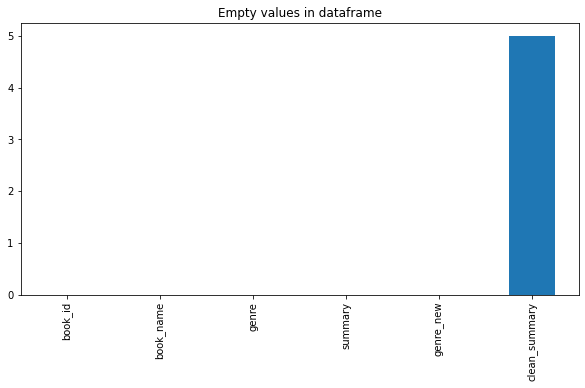

In [38]:
books_df = books.dropna(subset=['genre', 'summary'])
plt.figure(figsize=(10,5))
books_df.isna().sum().plot(kind='bar', title='Empty values in dataframe') #There are no empty values in Genres and Summary
plt.show()

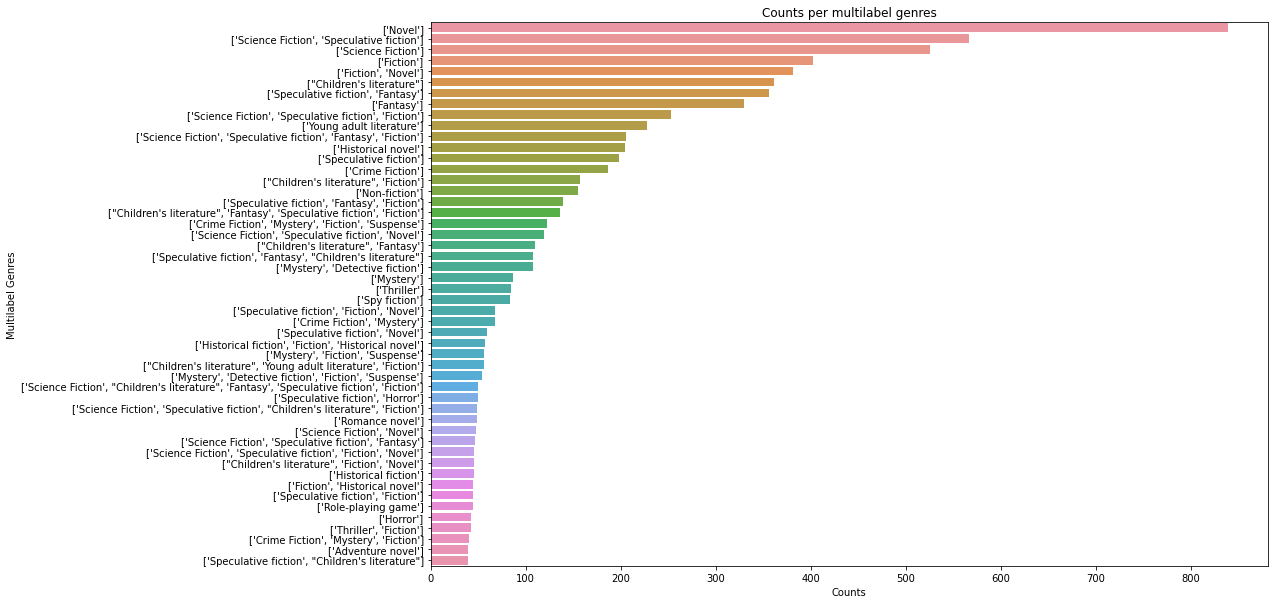

In [39]:
counts = {}
books['genre_test'] = books['genre'].map(lambda genre : list(json.loads(genre).values()))
g = books['genre_test'].map(str).to_numpy()
for i in g:
    #''.join(map(lambda x: chr(ord(x) + 1), sampleStr))
    #gn = ' '.join(map(lambda x: str(x) + ' |', i))
    if i in counts.keys():
        counts[i] += 1
    else:
        counts[i] = 1
df = pd.DataFrame({"Genre": list(counts.keys()),
                   "Counts": list(counts.values())})
g = df.nlargest(columns=["Counts"], n=50)
plt.figure(figsize=(15,10)) 
ax = sns.barplot(data=g, x= "Counts", y = "Genre") 
ax.set(xlabel = 'Counts', ylabel = 'Multilabel Genres')
plt.title('Counts per multilabel genres')
plt.show()

### Genres

In [40]:

book = books.drop(columns = ["genre"])
dict = {}
for index, row in books.iterrows():
    for x in row['genre_new']:
        if x in dict:
            dict[x] = dict[x] +1
        else:
            dict[x] = 1

dict.get("Fiction")
book.head()

,book_id,book_name,summary,genre_new,clean_summary,genre_test
0,620,Animal Farm,"Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p...","[""['Roman à clef'"", "" 'Satire'"", ' ""Children\'s literature""', "" 'Speculative fiction'"", "" 'Fiction']""]",old major old boar manor farm calls animals farm meeting compares humans parasites teaches animals revolutionary song beasts england major dies two young pigs snowball napoleon assume command turn dream philosophy animals revolt drive drunken irresponsible mr jones farm renaming animal farm adop...,"[Roman à clef, Satire, Children's literature, Speculative fiction, Fiction]"
1,843,A Clockwork Orange,"Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and...","[""['Science Fiction'"", "" 'Novella'"", "" 'Speculative fiction'"", "" 'Utopian and dystopian fiction'"", "" 'Satire'"", "" 'Fiction']""]",alex teenager living near future england leads gang nightly orgies opportunistic random ultra violence alexs friends droogs novels anglo russian slang nadsat dim slow witted bruiser gangs muscle georgie ambitious second command pete mostly plays along droogs indulge taste ultra violence characte...,"[Science Fiction, Novella, Speculative fiction, Utopian and dystopian fiction, Satire, Fiction]"
2,986,The Plague,"The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t...","[""['Existentialism'"", "" 'Fiction'"", "" 'Absurdist fiction'"", "" 'Novel']""]",text plague divided five parts town oran thousands rats initially unnoticed populace begin die streets hysteria develops soon afterward causing local newspapers report incident authorities responding public pressure order collection cremation rats unaware collection catalyst spread bubonic plagu...,"[Existentialism, Fiction, Absurdist fiction, Novel]"
3,2080,A Fire Upon the Deep,"The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti...","[""['Hard science fiction'"", "" 'Science Fiction'"", "" 'Speculative fiction'"", "" 'Fantasy'"", "" 'Fiction']""]",novel posits space around milky way divided concentric layers called zones constrained different laws physics allowing different degrees biological technological advancement innermost unthinking depths surrounds galactic core incapable supporting advanced life forms next layer slow zone roughly ...,"[Hard science fiction, Science Fiction, Speculative fiction, Fantasy, Fiction]"
4,2152,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a German soldier who—urged on by his school teacher—joins the German army shortly after the start of World War I. Bäumer arrives at the Western Front with his friends and schoolmates (Tjaden, Müller, Kropp and a number of other characters). There they me...","[""['War novel'"", "" 'Roman à clef']""]",book tells story paul b umer german soldier urged school teacher joins german army shortly start world war b umer arrives western front friends schoolmates tjaden ller kropp number characters meet stanislaus katczinsky older soldier nicknamed kat becomes pauls mentor fighting front b umer c

### Books

<BarContainer object of 59 artists>

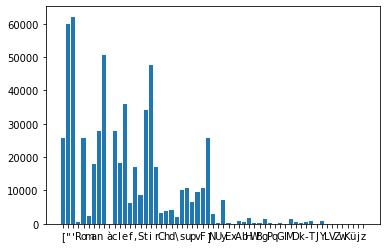

In [41]:
names = list(dict.keys())
values = list(dict.values())

plt.bar(range(len(dict)), values, tick_label=names)

In [42]:
for k in list(dict.keys()):
     if dict[k] < 100:
         del dict[k]

<BarContainer object of 45 artists>

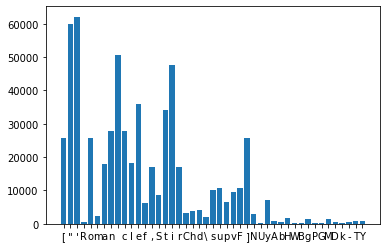

In [43]:
names = list(dict.keys())
values = list(dict.values())

plt.bar(range(len(dict)), values, tick_label=names)

### Average labels per book

In [44]:
sum = 0
for x in books['genre_new']:
    sum += len(list(x.split(",")))


averageGenresByBook = sum/len(books)
averageGenresByBook

2.3365781481193055

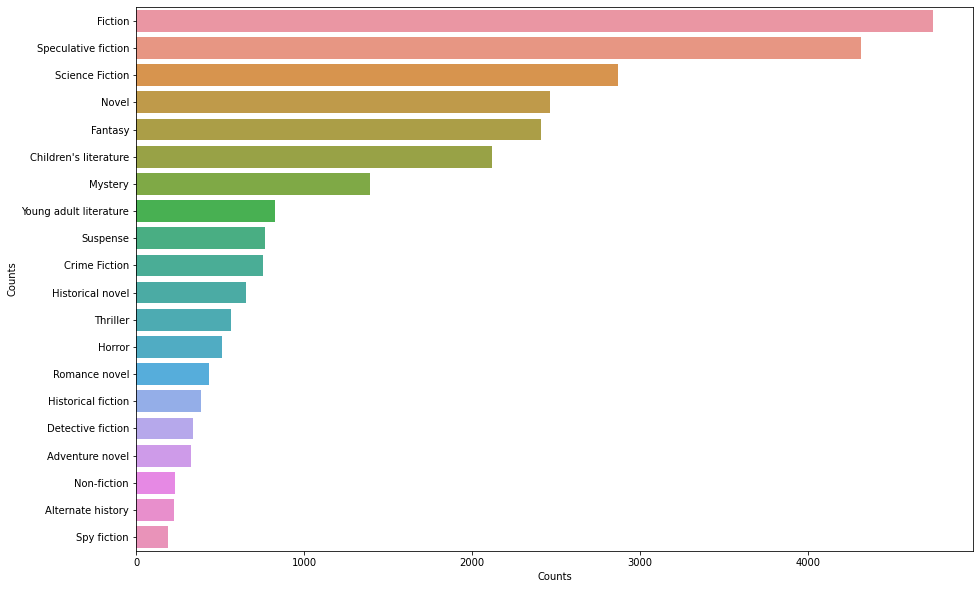

In [52]:
def genre_analysis(b_df):
    all_genres = b_df.genre_test
    count_genre = {}
    for genres in all_genres:
        for genre in genres:
            if genre in count_genre.keys():
                count_genre[genre] += 1
            else:
                count_genre[genre] = 1
    df = pd.DataFrame({"Genre": list(count_genre.keys()),
                   "Counts": list(count_genre.values())})
    g = df.nlargest(columns=["Counts"], n=20)
    plt.figure(figsize=(15,10)) 
    ax = sns.barplot(data=g, x= "Counts", y = "Genre") 
    ax.set(ylabel = 'Counts') 
    plt.show()
genre_analysis(books)